# Fabrica de juguetes
## Predicción de valor de cierre de oportunidades

### 1. Metadata

El dataset elegido tiene la información de transacciones de un fabricante de juguetes que comercializa y envía a varios paises del mundo. El mismo contiene 2823 filas y 25 columnas. 
Las columnas que se destacan por tener datos potencialmente útiles, los cuales se les aplicarán transformaciones y adecuaciones para lograr la obtención de información son las que se definen:

_QUANTITYORDERED_: cantidad ordenada en cada transacción de venta

_PRICEEACH_:       precio unitario

_SALES_:           subtotal de venta de cada línea de orden de venta

_ORDERDATE_:       fecha de transacción

_STATUS_:          informa acerca del estado de cada línea

*QTR_ID*:          número de trimestre

*MONTH_ID*:        número de mes

*YEAR_ID*:         año

_PRODUCTLINE_:     la línea de producto es un conjunto de juguetes que tiene una clasifiación común, por ejemplo: "Autos"

_MSRP_:            la sigla signifia Manufacter suggested retail price. Es el precio de venta que el fabricante le sugiere al distribuidor 

_PRODUCTCODE_:     es el código de identificación de cada producto

_CUSTOMERNAME_:    es el nombre del cliente

_CITY_:            ciudad de ubicación del cliente

_STATE_:           Estado de ubicación del cliente

_COUNTRY_:         país de ubicación del cliente

_DEALSIZE_:        tamaño del negocio

Fuente: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/code

### 2. Objetivo analítico

#### 2.1 Contexto comercial
Ante el contexto de cada vez más competencia es necesario aumentar la eficiencia para que la empresa pueda tener una mejor salud financiera. Este trabajo pretende encontrar respuestas para facilitarle a la Dirección la toma de decisiones en este sentido. De esta manera, con la información correcta se podrá saber cuando aumentar la fabricación, cuando tener mayor stock y cuando liquidarlo. Lo que será un gran aporte a la dirección financiera de la compañia.

#### 2.2 Problema comercial
Para esto se pide hacer un estudio para conocer la estacionalidad y la tendencia del negocio. Idealmente, se desea saber en qué nivel se pueden cerrar las oportunidades abiertas con los clientes para realizar una predicción de ingresos.

#### 2.3 Objetivo analítico
Se solicitó un dataset con la información de ventas de los últimos tiempos, enero de 2003 a mayo de 2005. De alli las preguntas se pretende contestar las siguientes preguntas:

##### Preguntas
En el desarrollo de este trabajo de exploración y análisis, intentaremos respondernos a las siguientes preguntas:

- ¿Podemos obtener datos estadísticos de esta actividad comercial?
- ¿Existirá una forma habitual de consumo?
- ¿Cómo se distribuyen las unidades vendidas en el mundo?
- ¿Cuáles son los juguetes más elegidos por nuestros consumidores?
- ¿Tenemos un _pricing_ adecuado?
- ¿Estamos sugiriendo bien el precio de venta minorista?
- ¿Es posible hacer una predicción de cómo se cerrarán las nuevas oportunidades abiertas?

### 3. Hipótesis
Se desea saber si hay estacionalidad de consumo y si los precios acompañan a las variaciones en la demanda. Es esperable que se venda más caro cuando hay más demanda y viceversa.
A priori podemos imaginar que  en el mundo hay fechas especiales en los que se compran más juguetes. Particularmente en occidente, la Navidad. Deberíamos registrar un pico de demanda en los meses previos (octubre - diciembre). Habrá que ver si ocurre lo mismo en los clientes de oriente.
El problema al que se apunta es a tener mayor visibilidad de la dinámica comercial conociendo la estacionlidad y la tendencia. Averiguar si existen patrones de consumo.
Esto nos permitirá tener los productos fabricados en el momento que se los necesita para la venta, con los precios de venta ajustados convenientemente. De esta manera, procurar un ajuste óptimo entre stocks y precio de venta que permita maximizar los ingresos a futuro.
Otro tema de estudio será averiguar si existe correlación entre, el precio de venta y el MSRP. Es perable que esté relacionado, de otra manera se estaría inyectando confusión a las jugueterías y/o a los consumidores. 
Finalmente se desea hacer una predicción de sobre las oportunidades abiertas, que nivel de ingresos nos pueden augurar.

### 4. Principales librerías e importación del dataset

#### 4.1 Filtro de Advertencias

In [43]:
import warnings

# Suprime todas las advertencias
warnings.filterwarnings("ignore")

# Restablece el filtro al estado predeterminado
# (mostrar advertencias)
#warnings.resetwarnings()

#### 4.2 Instalación de Librerías

In [44]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


#### 4.3 Llamado de librerías principales

In [45]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from bokeh.io import show, output_file
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.models import DatetimeTickFormatter
from bokeh.palettes import Spectral6
from bokeh.io import show, output_notebook
from bokeh.embed import file_html
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file
from bokeh.plotting import curdoc, figure, show

Loading BokehJS ...

#### 4.4 Importación del Dataset

In [46]:
url="https://raw.githubusercontent.com/martinsasia/Data-Science/cbe1d50b93e34ab139daea92a15a5a4c5d3ea353/sales_data_sample.csv?token=GHSAT0AAAAAACOLDFOYLC4EHIPCCUDK56SQZOT3PMA"
df=pd.read_csv(url,encoding = 'latin 1')

### 5. Transformación y limpieza de datos

#### 5.1 Informacion del Dataset

In [47]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [49]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

#### 5.2 Traducción de Columnas
El dataset está en inglés, pero como nos dirigimos a un público hispanoparlante trabajaremos con títulos y nombres de columnas en español.

In [50]:
#El dataset está en inglés, pero como me dirijo a un público hispanoparlante trabajaré con títulos y nombres de columnas en español para que sea lo más entendible posible.
df=df.rename(columns={'ORDERNUMBER': 'Nro_de_Orden', 'QUANTITYORDERED': 'Cantidad_Ordenada', 'PRICEEACH': 'Precio_Unitario', 'ORDERLINENUMBER': 'Nro_de_Linea',
       'SALES': 'Ventas', 'ORDERDATE': 'Fecha_de_Orden', 'STATUS': 'Estatus', 'QTR_ID': 'ID_Trim', 'MONTH_ID': 'ID_Mes', 'YEAR_ID': 'ID_Año',
       'PRODUCTLINE': 'Linea_de_Producto', 'MSRP': 'Pcio_Sugerido_Fabrica', 'PRODUCTCODE': 'Codigo_Pdto', 'CUSTOMERNAME': 'Nombre_Cliente', 'PHONE': 'Telefono',
       'ADDRESSLINE1': 'Direccion_1', 'ADDRESSLINE2': 'Direccion_2', 'CITY': 'Ciudad', 'STATE': 'Estado', 'POSTALCODE': 'Codigo_Postal',
       'COUNTRY': 'Pais', 'TERRITORY': 'Region', 'CONTACTLASTNAME': 'Apellido_Contacto', 'CONTACTFIRSTNAME': 'Nombre_Contacto',
       'DEALSIZE': 'Tamaño_Negocio'})
df.describe(include = 'all')

,Nro_de_Orden,Cantidad_Ordenada,Precio_Unitario,Nro_de_Linea,Ventas,Fecha_de_Orden,Estatus,ID_Trim,ID_Mes,ID_Año,...,Direccion_1,Direccion_2,Ciudad,Estado,Codigo_Postal,Pais,Region,Apellido_Contacto,Nombre_Contacto,Tamaño_Negocio
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.00000,...,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,252,6,NaN,NaN,NaN,...,92,9,73,16,73,19,3,77,72,3
top,NaN,NaN,NaN,NaN,NaN,11/14/2003 0:00,Shipped,NaN,NaN,NaN,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,2617,NaN,NaN,NaN,...,259,55,304,416,259,1004,1407,259,259,1384
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,NaN,NaN,2.717676,7.092455,2003.81509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,NaN,1.203878,3.656633,0.69967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,NaN,1.000000,1.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,NaN,NaN,2.000000,4.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,NaN,NaN,3.000000,8.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,NaN,NaN,4.000000,11.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5.3 Limpieza de datos
Reemplazo de datos nulos y eliminación de columnas con datos irrelevantes.

In [51]:
df.nunique()

Nro_de_Orden              307
Cantidad_Ordenada          58
Precio_Unitario          1016
Nro_de_Linea               18
Ventas                   2763
Fecha_de_Orden            252
Estatus                     6
ID_Trim                     4
ID_Mes                     12
ID_Año                      3
Linea_de_Producto           7
Pcio_Sugerido_Fabrica      80
Codigo_Pdto               109
Nombre_Cliente             92
Telefono                   91
Direccion_1                92
Direccion_2                 9
Ciudad                     73
Estado                     16
Codigo_Postal              73
Pais                       19
Region                      3
Apellido_Contacto          77
Nombre_Contacto            72
Tamaño_Negocio              3
dtype: int64

In [52]:
#La columna Direccion_1 no tiene datos sirvan para obtener informaciones relevantes, al igual que Direccion_2 que esta mayormente vacía. 
#Se aplica el mismo criterio para 'Nro_de_Orden', 'Nro_de_linea', 'Telefono', 'Codigo_Postal', 'Nombre_Contacto', 'Apellido_Contacto']. 

df = df.drop(['Nro_de_Orden', 'Nro_de_Linea', 'Telefono', 'Direccion_1', 'Direccion_2', 'Codigo_Postal', 'Nombre_Contacto', 'Apellido_Contacto'], axis= 'columns')

In [53]:
df.isna()

,Cantidad_Ordenada,Precio_Unitario,Ventas,Fecha_de_Orden,Estatus,ID_Trim,ID_Mes,ID_Año,Linea_de_Producto,Pcio_Sugerido_Fabrica,Codigo_Pdto,Nombre_Cliente,Ciudad,Estado,Pais,Region,Tamaño_Negocio
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2819,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2820,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2821,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [54]:
df[['Pais','Estado','Region']].tail(40)

,Pais,Estado,Region
2783,USA,MA,NaN
2784,Canada,BC,NaN
2785,Germany,NaN,EMEA
2786,USA,PA,NaN
2787,UK,Isle of Wight,EMEA
2788,USA,NY,NaN
2789,Japan,Tokyo,Japan
2790,USA,MA,NaN
2791,Australia,NSW,APAC
2792,Finland,NaN,EMEA


In [55]:
#Los territorios son muy abarcativos, sólo 3 datos únicos, EMEA, APAC y Japón. Japón es muy pequeño en comparación, se podría integrar a APAC. No tiene sentido dividir el mundo de esa manera.
#Se eliminará la columna Region también.

df = df.drop(['Region'], axis= 'columns')

In [56]:
df.isnull().sum()

Cantidad_Ordenada           0
Precio_Unitario             0
Ventas                      0
Fecha_de_Orden              0
Estatus                     0
ID_Trim                     0
ID_Mes                      0
ID_Año                      0
Linea_de_Producto           0
Pcio_Sugerido_Fabrica       0
Codigo_Pdto                 0
Nombre_Cliente              0
Ciudad                      0
Estado                   1486
Pais                        0
Tamaño_Negocio              0
dtype: int64

In [57]:
#Busco los valores de Estado nulos y le asigno el valor de la columna Pais
df['Estado'].fillna(df['Pais'], inplace=True)


In [58]:
df.isnull().sum()

Cantidad_Ordenada        0
Precio_Unitario          0
Ventas                   0
Fecha_de_Orden           0
Estatus                  0
ID_Trim                  0
ID_Mes                   0
ID_Año                   0
Linea_de_Producto        0
Pcio_Sugerido_Fabrica    0
Codigo_Pdto              0
Nombre_Cliente           0
Ciudad                   0
Estado                   0
Pais                     0
Tamaño_Negocio           0
dtype: int64

In [59]:
#Interesará saber si la columna Precio_Unitario es equivalente a la dividir Ventas en Cantidad_Ordenada. 
#Para esto, se crea una columna calculada que será el subtotal de ventas dividido la cantidad vendida y la llamaremos Precio_Unitario_Real
df['Precio_Unitario_Real'] = df['Ventas']/df['Cantidad_Ordenada']

#### 5.4 Creación de una columna con datos de fecha Datetime
Los datos de fecha que trae el dataset original no son utilizables, por eso se adecúa esta columna.

In [60]:
#Creo una columna ID_Dia
df['ID_Dia']=df['Fecha_de_Orden'].str.split("/").str.get(1).astype(int)

In [61]:
#Creo un dataframe con los datos de fecha
year = df['ID_Año'].astype(int)
month = df['ID_Mes'].astype(int)
day = df['ID_Dia'].astype(int)
date = pd.DataFrame(data={'year':year,'month':month, 'day':day})
date

,year,month,day
0,2003,2,24
1,2003,5,7
2,2003,7,1
3,2003,8,25
4,2003,10,10
...,...,...,...
2818,2004,12,2
2819,2005,1,31
2820,2005,3,1
2821,2005,3,28


In [62]:
#Reemplazo Fecha_de_Orden con el dato con formato fecha
df['Fecha_de_Orden']= pd.to_datetime(date)
df['Fecha_de_Orden']
df.sort_values(by='Fecha_de_Orden', inplace=True)

In [63]:
df.head()

,Cantidad_Ordenada,Precio_Unitario,Ventas,Fecha_de_Orden,Estatus,ID_Trim,ID_Mes,ID_Año,Linea_de_Producto,Pcio_Sugerido_Fabrica,Codigo_Pdto,Nombre_Cliente,Ciudad,Estado,Pais,Tamaño_Negocio,Precio_Unitario_Real,ID_Dia
578,30,100.00,5151.00,2003-01-06,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,Nashua,NH,USA,Medium,171.70,6
680,50,67.80,3390.00,2003-01-06,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,Nashua,NH,USA,Medium,67.80,6
1267,22,86.51,1903.22,2003-01-06,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,Nashua,NH,USA,Small,86.51,6
2024,49,34.47,1689.03,2003-01-06,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,Nashua,NH,USA,Small,34.47,6
1539,45,31.20,1404.00,2003-01-09,Shipped,1,1,2003,Vintage Cars,33,S24_1937,"Blauer See Auto, Co.",Frankfurt,Germany,Germany,Small,31.20,9


In [64]:
#Se desea tener una columna para conocer el día de la semana ya que puede ser influyente para comprender el comportamiento de las ventas diarias.
df['Dia_Semana'] = df['Fecha_de_Orden'].dt.weekday.map({
    0: 'lunes',
    1: 'martes',
    2: 'miércoles',
    3: 'jueves',
    4: 'viernes',
    5: 'sábado',
    6: 'domingo'
})

#### 5.5 Traducción de los datos
Los resultados obtenidos en adelante se presentarán traducidos del Inglés al Español. 

In [65]:
# Reviso cuáles son los datos a traducir
df['Estatus'].unique()

array(['Shipped', 'Resolved', 'Cancelled', 'On Hold', 'Disputed',
       'In Process'], dtype=object)

In [66]:
#Traducción 1
df['Estatus'].replace(
    {'Shipped': 'Enviada', 'Resolved': 'Resuelta', 'Cancelled': 'Cancelada', 'On Hold': 'En Espera', 'Disputed': 'En Disputa', 'In Process': 'En Proceso'
    }, inplace = True)

In [67]:
# Reviso cuáles son los datos a traducir
df['Linea_de_Producto'].unique()

array(['Vintage Cars', 'Trucks and Buses', 'Classic Cars', 'Trains',
       'Ships', 'Planes', 'Motorcycles'], dtype=object)

In [68]:
# Tracucción 2
df['Linea_de_Producto'].replace(
    {'Vintage Cars': 'Autos Antiguos', 'Trucks and Buses': 'Camiones y Autobuses', 'Classic Cars': 'Autos Clásicos', 'Trains': 'Trenes', 'Ships': 'Barcos', 'Planes': 'Aviones', 'Motorcycles': 'Motocicletas'
    }, inplace = True)

In [69]:
# Reviso cuáles son los datos a traducir
df['Pais'].unique()

array(['USA', 'Germany', 'Norway', 'Spain', 'Denmark', 'Italy',
       'Philippines', 'UK', 'Sweden', 'France', 'Belgium', 'Singapore',
       'Austria', 'Australia', 'Finland', 'Canada', 'Japan', 'Ireland',
       'Switzerland'], dtype=object)

In [70]:
#Traducción 3
df['Pais'].replace(
    {'USA': 'Estados Unidos', 'Germany': 'Alemania', 'Norway': 'Noruega', 'Spain': 'España', 'Denmark': 'Dinamarca', 'Italy': 'Italia', 'Philippines': 'Filipinas',
     'UK': 'Reino Unido', 'Sweden': 'Suecia', 'France': 'Francia', 'Belgium': 'Bélgica', 'Singapore': 'Singapur', 'Finland': 'Finlandia', 'Canada': 'Canadá',
     'Japan': 'Japón', 'Ireland': 'Irlanda', 'Switzerland': 'Suiza'
    }, inplace = True)

In [71]:
## Reviso cuáles son los datos a traducir 
df['Tamaño_Negocio'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [72]:
# Traducción 4
df['Tamaño_Negocio'].replace(
    {'Medium': 'Mediano', 'Small': 'Pequeño', 'Large': 'Grande'
    }, inplace = True)

#### 5.6 Transacciones útiles
En este estudio únicamente se tendrá en cuenta los datos de transacciones cerradas, no canceladas ni en disputa.

In [73]:
#Antes de empezar a trabajar con el dataframe, filtraremos dejando a fuera del análisis, para nuestro caso a las transacciones que no se concretaron. 
#Las no concretaron son las que tienen Estatus: 'En Disputa' y 'Cancelada'.
df['Estatus'].unique()

array(['Enviada', 'Resuelta', 'Cancelada', 'En Espera', 'En Disputa',
       'En Proceso'], dtype=object)

In [74]:
#Aplico el filtro y en lo consecutivo trabajaré con df_vendido
df_vendido = df.loc[df['Estatus'].isin(['Enviada', 'En Proceso', 'En Espera', 'Resuelta'])]
df= None
df_vendido.head()

,Cantidad_Ordenada,Precio_Unitario,Ventas,Fecha_de_Orden,Estatus,ID_Trim,ID_Mes,ID_Año,Linea_de_Producto,Pcio_Sugerido_Fabrica,Codigo_Pdto,Nombre_Cliente,Ciudad,Estado,Pais,Tamaño_Negocio,Precio_Unitario_Real,ID_Dia,Dia_Semana
578,30,100.00,5151.00,2003-01-06,Enviada,1,1,2003,Autos Antiguos,170,S18_1749,Online Diecast Creations Co.,Nashua,NH,Estados Unidos,Mediano,171.70,6,lunes
680,50,67.80,3390.00,2003-01-06,Enviada,1,1,2003,Autos Antiguos,60,S18_2248,Online Diecast Creations Co.,Nashua,NH,Estados Unidos,Mediano,67.80,6,lunes
1267,22,86.51,1903.22,2003-01-06,Enviada,1,1,2003,Autos Antiguos,92,S18_4409,Online Diecast Creations Co.,Nashua,NH,Estados Unidos,Pequeño,86.51,6,lunes
2024,49,34.47,1689.03,2003-01-06,Enviada,1,1,2003,Autos Antiguos,41,S24_3969,Online Diecast Creations Co.,Nashua,NH,Estados Unidos,Pequeño,34.47,6,lunes
1539,45,31.20,1404.00,2003-01-09,Enviada,1,1,2003,Autos Antiguos,33,S24_1937,"Blauer See Auto, Co.",Frankfurt,Germany,Alemania,Pequeño,31.20,9,jueves


#### 5.7 El problema del precio unitario
El dataset trae datos de precio unitario que tiene un comportamiento extraño, y merece la pena revisar a qué se debe.

In [75]:
#Comparamos los valores de tendencia central del precio unitario y el precio de sugerencia de los juguetes vendidos 
Pcio_Mediana = df_vendido.groupby('Linea_de_Producto')[['Pcio_Sugerido_Fabrica','Precio_Unitario','Precio_Unitario_Real']].median()
Pcio_Media =  df_vendido.groupby('Linea_de_Producto')[['Pcio_Sugerido_Fabrica','Precio_Unitario','Precio_Unitario_Real']].mean()

##### 5.7.1 Media de los precios unitarios
Se observa que en determinadas situaciones no se da que la cantidad vendida multiplicada por el precio unitario es igual al precio de venta. Para dicernir qué sucede y poder salvar esta situación haremos una comparativa entre el comportamiento de el *Precio_Unitario* y el *Precio_Unitario_Real = _Ventas_ / Cantidad_Ordenada*
Veamos los valores medios de todos los valores de precio que tenemos.

In [76]:
Pcio_Media.round(2)

,Pcio_Sugerido_Fabrica,Precio_Unitario,Precio_Unitario_Real
Linea_de_Producto,,,
Autos Antiguos,86.51,78.06,90.32
Autos Clásicos,119.79,87.22,115.21
Aviones,88.96,82.09,90.87
Barcos,86.11,83.74,88.20
Camiones y Autobuses,102.47,87.53,103.95
Motocicletas,96.62,82.80,99.73
Trenes,72.63,75.33,83.62


##### 5.7.2 Mediana de los precios unitarios

In [77]:
Pcio_Mediana.round(2)

,Pcio_Sugerido_Fabrica,Precio_Unitario,Precio_Unitario_Real
Linea_de_Producto,,,
Autos Antiguos,88.0,86.30,86.30
Autos Clásicos,124.0,100.00,116.44
Aviones,80.0,83.58,83.58
Barcos,86.0,87.48,87.48
Camiones y Autobuses,116.0,100.00,109.79
Motocicletas,95.0,93.54,93.54
Trenes,62.0,67.26,67.26


Podemos notar que los valores de *Precio_Unitario* y *Precio_Unitario_Real* no tienen idéntica media y mediana como esperábamos. En consecuencia, se realizará un gráfico de distribución para ver si se puede obtener alguna información más clara de lo que ocurre. 

##### 5.7.3 Reemplazo de datos del precio unitario

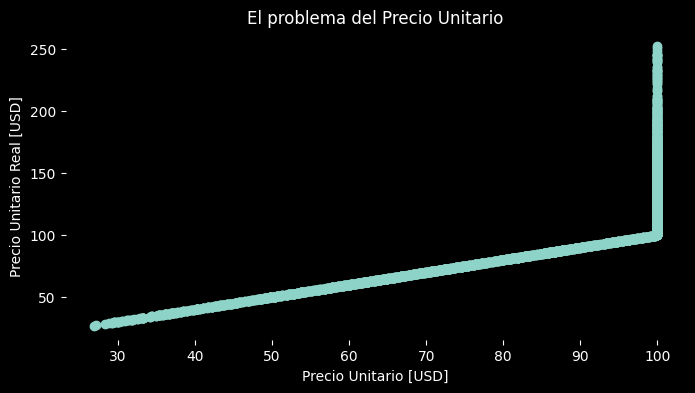

In [78]:
mpl.style.use('dark_background')
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(df_vendido['Precio_Unitario'], df_vendido['Precio_Unitario_Real'])
ax.set_title('El problema del Precio Unitario')
ax.set_xlabel('Precio Unitario [USD]')
ax.set_ylabel('Precio Unitario Real [USD]')
ax.grid(visible=False)
ax.set_frame_on(False)

Analizando la distribución, vemos que la paridad se cumple hasta que el precio unitario que trae el Dataset llega al valor de USD 100. A partír de allí, ningún producto adopta un valor superior.

Asimismo, no podemos suponer que hay un impuesto o costo de flete que se esté adicionando para alcanzar el subtotal de venta que trae la columna _Ventas_, ya que no hay columnas que contengan esos datos.

Por consiguiente, podemos asumir que al momento de la obtención de los datos se cometió algún error con la columna *Precio_Unitario*. Para darle solución se reemplazará en el Dataset los valores originales de *Precio_Unitario* por lo que resulta de la dividir el subtotal de ventas por la cantidad ordenada. 

*Precio_Unitario* = *Ventas* / *Cantidad_Ordenada*. 

Finalmente eliminamos la columna *Precio_Unitario_Real*.

In [79]:
df_vendido['Precio_Unitario'] = df_vendido['Precio_Unitario_Real']
df_vendido = df_vendido.drop('Precio_Unitario_Real', axis= 'columns')

Reordenamos las columnas para que se vea de una forma más conveniente.

In [80]:
df_vendido = df_vendido.reindex(columns=[
    'Fecha_de_Orden', 'ID_Año', 'ID_Trim', 'ID_Mes','ID_Dia', 
    'Dia_Semana', 'Linea_de_Producto', 'Codigo_Pdto', 'Cantidad_Ordenada', 
    'Precio_Unitario', 'Ventas', 'Pcio_Sugerido_Fabrica', 'Estatus', 'Tamaño_Negocio', 
    'Nombre_Cliente', 'Ciudad','Pais', 'Estado'])
df_vendido.head()

,Fecha_de_Orden,ID_Año,ID_Trim,ID_Mes,ID_Dia,Dia_Semana,Linea_de_Producto,Codigo_Pdto,Cantidad_Ordenada,Precio_Unitario,Ventas,Pcio_Sugerido_Fabrica,Estatus,Tamaño_Negocio,Nombre_Cliente,Ciudad,Pais,Estado
578,2003-01-06,2003,1,1,6,lunes,Autos Antiguos,S18_1749,30,171.70,5151.00,170,Enviada,Mediano,Online Diecast Creations Co.,Nashua,Estados Unidos,NH
680,2003-01-06,2003,1,1,6,lunes,Autos Antiguos,S18_2248,50,67.80,3390.00,60,Enviada,Mediano,Online Diecast Creations Co.,Nashua,Estados Unidos,NH
1267,2003-01-06,2003,1,1,6,lunes,Autos Antiguos,S18_4409,22,86.51,1903.22,92,Enviada,Pequeño,Online Diecast Creations Co.,Nashua,Estados Unidos,NH
2024,2003-01-06,2003,1,1,6,lunes,Autos Antiguos,S24_3969,49,34.47,1689.03,41,Enviada,Pequeño,Online Diecast Creations Co.,Nashua,Estados Unidos,NH
1539,2003-01-09,2003,1,1,9,jueves,Autos Antiguos,S24_1937,45,31.20,1404.00,33,Enviada,Pequeño,"Blauer See Auto, Co.",Frankfurt,Alemania,Germany


### 6. Análisis Exploratorio de Datos EDA

#### 6.1 Histograma de ventas
Luego de haber adecuado los datos para poder trabajar, realizaremos un histograma para ver si estamos en presencia de una distribución normal. Esto nos dará la pauta de cuáles son los estadisticos más representativos a usar, a la hora de expresar alguna información clave en cuanto a las ventas.

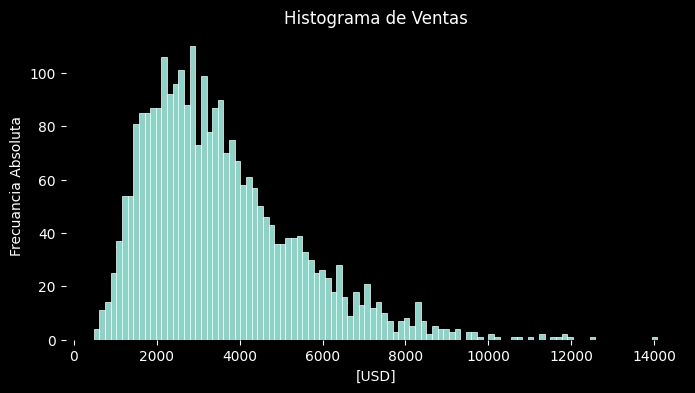

In [81]:
mpl.style.use('dark_background')
fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df_vendido['Ventas'].values.flatten(),bins=100, edgecolor='white', linewidth=0.5)
ax.set_title('Histograma de Ventas')
ax.set_xlabel('[USD]')
ax.set_ylabel('Frecuancia Absoluta')
ax.grid(visible=False)
ax.set_frame_on(False)
plt.show()

El histograma de ventas muestra una distribución normal con asimetría a izquierda. Con lo cual, si nos interesa saber cual es el valor más probable de una venta aleatoria podemos utilizar el valor de la mediana, ya que el promedio se verá afectado mayormente por esporádicas ventas de mayor importe.

In [82]:
#Asimetría a izquierda, la media es mayor que la mediana
df_vendido.Ventas.mean() > df_vendido.Ventas.median()


True

#### 6.2 Ventas diarias
Empezaremos a estudiar la existencia de estacionalidad. Para esto, realizamos un gráfico que nos muestre la evolución diaria de las ventas en el transcurso de los datos que nos trae el data set del fabricante. 

##### 6.2.1 Creación de funciones a graficar

In [83]:
venta_diaria = df_vendido.groupby(['ID_Año', 'ID_Mes', 'ID_Dia','Fecha_de_Orden'])[['Ventas', 'Cantidad_Ordenada']].sum().reset_index()
venta_diaria = venta_diaria.set_index('Fecha_de_Orden')
max_sale_2003= venta_diaria.loc[venta_diaria['ID_Año'].isin([2003])].Ventas.max() #Se calcula el valor diario de venta máxima de 2003
max_sale_2004= venta_diaria.loc[venta_diaria['ID_Año'].isin([2004])].Ventas.max() #Se calcula el valor diario de venta máxima de 2004
max_sale_2005= venta_diaria[venta_diaria['ID_Año'].isin([2005])].Ventas.max() #Se calcula el valor diario de venta máxima de 2005

#Agrego las fechas que faltan
venta_diaria = venta_diaria.asfreq(freq='1d' ,fill_value=0)

##### 6.2.2 Venta diarias

In [84]:
curdoc().theme = 'dark_minimal'
line_plot = figure(width=1200, height=400, title='Ventas Diarias',
                   #x_axis_label='Fecha', 
                   y_axis_label='100K [USD]',x_axis_type='datetime',y_axis_type='mercator', tools='box_zoom, reset, wheel_zoom, xwheel_zoom, save, pan')
line_plot.line(venta_diaria.index, venta_diaria.Ventas, 
                legend_label = 'Ventas Diarias',line_width=2, color= 'violet')
line_plot.line(venta_diaria.index, max_sale_2005, 
                legend_label = 'Máximo 2005: USD {}'.format(max_sale_2005.round(1)),line_width=1.5, color= 'red',line_dash= 'dotted')
line_plot.line(venta_diaria.index, max_sale_2004, 
                legend_label = "Máximo 2004: USD {}".format(max_sale_2004.round(1)),line_width=1.5, color= 'orange', line_dash= 'dotted')
line_plot.line(venta_diaria.index, max_sale_2003, 
                legend_label = "Máximo 2003: USD {}".format(max_sale_2003.round(1)),line_width=1.5, color= 'yellow', line_dash= 'dotted')
line_plot.xaxis.formatter=DatetimeTickFormatter(
#       hours="%d %B %Y",
        days="%d %B %Y",
        months="%d %B %Y",
        years="%d %B %Y")
line_plot.toolbar.autohide = True
line_plot.legend.location = "top_left"
output_notebook()
show(line_plot)

Loading BokehJS ...

En este gráfico se representan los subtotales de venta en el tiempo para conocer el historial de la empresa. Se pueden observar picos en la zona entre los meses de octubre y diciembre, como esperábamos. Lo veremos mejor en un gráfico en donde se pueda ver mejor el comporatamiento mes a mes.

#### 6.3 Comparativa de interanual de ventas

##### 6.3.1 Analizamos las ventas mensuales y los promedios interanuales de cada mes.
Realizamos las tablas para graficar.

In [85]:
#Agrupamos la suma de ventas mensuales de cada año
venta_mensual= venta_diaria.groupby(['ID_Año', 'ID_Mes'])[['Ventas']].sum().reset_index()
venta_mensual= venta_mensual.loc[venta_mensual['ID_Año']>0]

In [86]:
#Hago una tabla dinámica con el data set anterior para poder gráficarlo de forma más simple con Seaborn
ventas_mes_anio = venta_mensual.pivot_table(values='Ventas', index="ID_Mes", columns='ID_Año')
ventas_mes_anio.set_index(ventas_mes_anio.index-1, inplace=True)
ventas_mes_anio

ID_Año,2003,2004,2005
ID_Mes,,,
0,129753.60,316577.42,339543.42
1,140836.19,311419.53,358186.18
2,174504.90,205733.73,374262.76
3,201609.55,206148.12,235620.42
4,192673.11,228080.73,411661.07
5,168082.56,186255.32,NaN
6,187731.88,327144.09,NaN
7,197809.30,461501.27,NaN
8,263973.36,320750.91,NaN


A continuación están los promedios de ventas totales mensuales

In [87]:
#Para el gráfico de barras, tomaré el promedio de ventas de cada mes en los últimos 2 o 3 años, dependiendo de la disponibilidad de datos.
venta_mensual_media= venta_mensual.groupby(['ID_Mes'])[['Ventas']].mean().reset_index()
venta_mensual_media.set_index('ID_Mes', inplace=True)
venta_mensual_media.round(2)

,Ventas
ID_Mes,
1,261958.15
2,270147.30
3,251500.46
4,214459.36
5,277471.64
6,177168.94
7,257437.98
8,329655.29
9,292362.14


##### 6.3.2 Patrón de ventas mensuales
Se grafica la evolucion de ventas mensualmente con líneas. Las barras representan las ventas promedio del mes entre los años involucrados

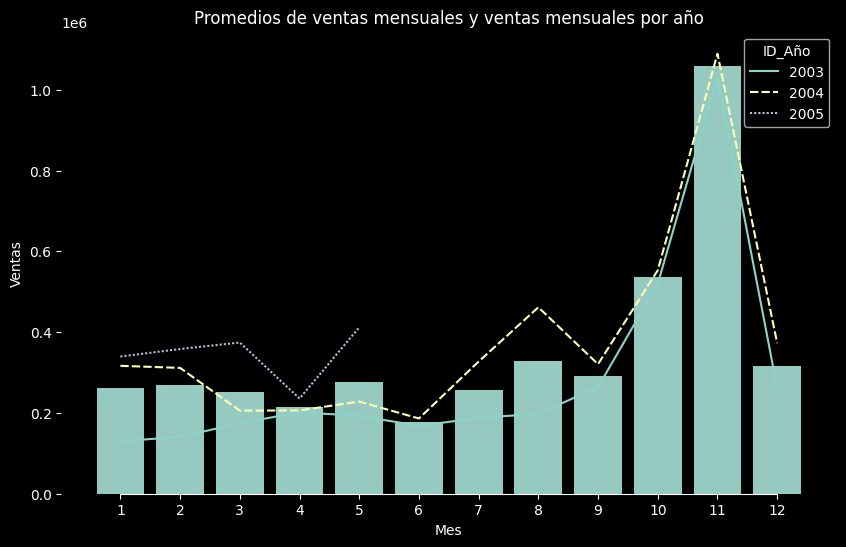

In [168]:

plt.figure(figsize=(10,6))
sns.barplot(y='Ventas',x='ID_Mes', data=venta_mensual_media)
sns.lineplot(data=ventas_mes_anio)
plt.title('Promedios de ventas mensuales y ventas mensuales por año')
plt.xlabel('Mes')
plt.ylabel('Ventas')
sns.despine(trim=True, left=True)
plt.show()

En primer lugar podemos observar del gráfico una tendencia a la alza, ya que las curvas de ventas se posicionan año a año una encima de la otra. En 2005 se esta vendiendo más que en 2004 y en 2004 más que en 2003.
Podemos observar que los clientes se preparan para la Navidad a partir de Octubre. Hay que investigar qué otro fenómeno puede estar sucediendo en mayo y agosto.
En este sentido, es interesante saber adónde van los productos. De esa forma podemos tomar los paises más influyentes y averiguar si hay alguna fecha importante que produzca la demanda. 
De lograr esto último, podríamos confirmar que se trata de un consumo estacional.
Antes de abordar los precios de venta, veamos en dónde están los principales clientes.

#### 6.4 Averiguamos como se distrubuyen nuestros productos en el mundo

##### 6.4.1 Consulta de tablas de paises y cantidad de juguetes entregados
Realizamos una agrupación Paises y Línea de producto por cantidad ordenada y resumimos con una tabla dinámica.

In [88]:
#agrupo la tabla para obtener solo las columnas que necesito, país, línea de producto y cantidad. Sumo las cantidades.
data= df_vendido.groupby(['Pais', 'Linea_de_Producto'])[['Cantidad_Ordenada']].sum().reset_index()
data

,Pais,Linea_de_Producto,Cantidad_Ordenada
0,Alemania,Autos Antiguos,276
1,Alemania,Autos Clásicos,1281
2,Alemania,Aviones,245
3,Alemania,Barcos,55
4,Alemania,Camiones y Autobuses,81
...,...,...,...
110,Suecia,Barcos,80
111,Suecia,Camiones y Autobuses,433
112,Suecia,Motocicletas,133
113,Suecia,Trenes,32


Mostraremos en una tabla dinámica las cantidades consumidas por cada país de los distintas líneas de juguetes

In [89]:
#Hacemos una tabla dinámica para que quede en columna los juguetes y fila los paises.
data = data.pivot_table(values='Cantidad_Ordenada', index="Linea_de_Producto", columns='Pais')
data

Pais,Alemania,Australia,Austria,Bélgica,Canadá,Dinamarca,España,Estados Unidos,Filipinas,Finlandia,Francia,Irlanda,Italia,Japón,Noruega,Reino Unido,Singapur,Suecia,Suiza
Linea_de_Producto,,,,,,,,,,,,,,,,,,,
Autos Antiguos,276.0,1876.0,324.0,446.0,476.0,240.0,2344.0,8112.0,27.0,252.0,1955.0,28.0,1303.0,313.0,495.0,1366.0,437.0,270.0,NaN
Autos Clásicos,1281.0,1818.0,937.0,147.0,456.0,1070.0,4380.0,11605.0,478.0,1284.0,3540.0,202.0,948.0,314.0,1158.0,1078.0,1043.0,508.0,1078.0
Aviones,245.0,750.0,200.0,41.0,317.0,70.0,790.0,3476.0,215.0,421.0,1136.0,115.0,1122.0,547.0,325.0,479.0,NaN,NaN,NaN
Barcos,55.0,24.0,113.0,343.0,486.0,436.0,1312.0,2130.0,NaN,315.0,766.0,NaN,194.0,208.0,NaN,831.0,174.0,80.0,NaN
Camiones y Autobuses,81.0,705.0,203.0,NaN,517.0,73.0,1709.0,3932.0,NaN,384.0,1067.0,37.0,47.0,102.0,308.0,291.0,888.0,433.0,NaN
Motocicletas,121.0,876.0,197.0,NaN,41.0,NaN,521.0,5080.0,241.0,447.0,2404.0,58.0,77.0,309.0,484.0,371.0,44.0,133.0,NaN
Trenes,89.0,33.0,NaN,97.0,NaN,134.0,509.0,870.0,NaN,89.0,222.0,50.0,82.0,49.0,72.0,168.0,174.0,32.0,NaN


Reemplazamos los valores NaN para que no queden huecos en el mapa de calor

In [90]:
#reemplazo los valores NaN por 0
valores = data.values
indice = pd.Series(data.index)
columnas = pd.Series(data.columns)
print(indice, columnas)

# defino el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
# transformo los valores del dataset
transformados = imputador.fit_transform(valores)
transformados=pd.DataFrame(transformados)
transformados= transformados.rename(columns=columnas)
transformados= transformados.rename(index= indice)
data=transformados

0          Autos Antiguos
1          Autos Clásicos
2                 Aviones
3                  Barcos
4    Camiones y Autobuses
5            Motocicletas
6                  Trenes
Name: Linea_de_Producto, dtype: object 0           Alemania
1          Australia
2            Austria
3            Bélgica
4             Canadá
5          Dinamarca
6             España
7     Estados Unidos
8          Filipinas
9          Finlandia
10           Francia
11           Irlanda
12            Italia
13             Japón
14           Noruega
15       Reino Unido
16          Singapur
17            Suecia
18             Suiza
Name: Pais, dtype: object


##### 6.4.2 Esquematización de la distribución de juguetes

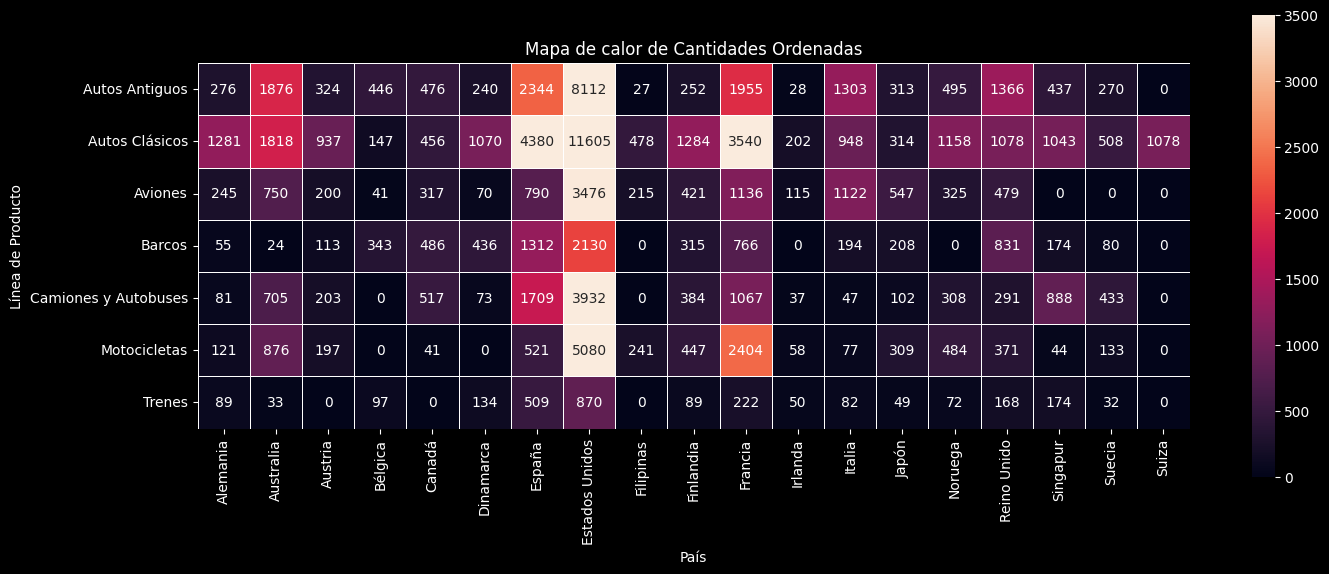

In [91]:
#Mapa de calor 
plt.figure(figsize=(16,6))
ax= sns.heatmap(data, linewidths=0.5, linecolor='white', vmin= data.min().min(),vmax=3500 , annot=True, fmt= '.5g', square= True)
ax.set(xlabel="País", ylabel="Línea de Producto")
ax.set_title('Mapa de calor de Cantidades Ordenadas')
plt.show()

Podemos observar que los paises que más consumen son predominantemente USA y luego se disputan entre Australia, Francia y España. 
Otra iformacción destacada es que los autos son los productos de mayor interés: Classic Cars, Vintage Cars y Motorecycles.

Las celebraciones del día del niño en estos paises se dan de la siguiente manera:

Australia: 4to miércoles de octubre

Francia: 1 de junio

España: 15 de abril

Estados Unidos: 2do domingo de julio

(1)

En el gráfico de **Patrón de Ventas Mensuales** podemos notar un incremento de ventas en el mes anterior al día del niño, salvo Australia en que el festejo es más cercano a fin de mes y seguramente las ventas se estén reflejando en el mismo mes de ocurrencia.

1.Datos obtenidos de https://es.wikipedia.org/wiki/D%C3%ADa_Mundial_del_Ni%C3%B1o

### 6.5 ¿Tenemos un *pricing* adecuado?

#### 6.5.1 Distribuciones del precio unitario y las cantidades ordenadas
Un primer paso interesante es entender la distribución de precios que tenemos al igual que las cantides entregadas para continuar investigando.

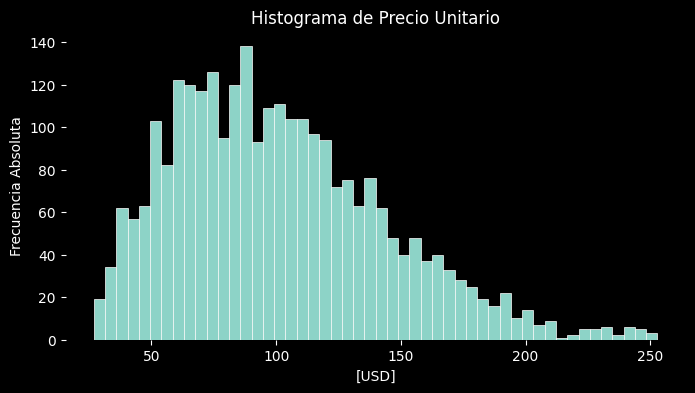

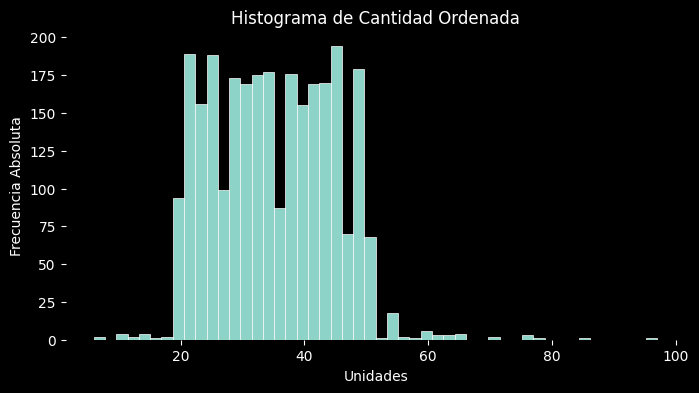

In [92]:
mpl.style.use('dark_background')
fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df_vendido['Precio_Unitario'].values.flatten(),bins=50, edgecolor='white', linewidth=0.5)
ax.set_title('Histograma de Precio Unitario')
ax.set_xlabel('[USD]')
ax.set_ylabel('Frecuencia Absoluta')
ax.grid(visible=False)
ax.set_frame_on(False)

fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df_vendido['Cantidad_Ordenada'].values.flatten(),bins=50, edgecolor='white', linewidth=0.5)
ax.set_title('Histograma de Cantidad Ordenada')
ax.set_xlabel('Unidades')
ax.set_ylabel('Frecuencia Absoluta')
ax.grid(visible=False)
ax.set_frame_on(False)

Se realizaron esta serie de gráficos precedentes para ver la distribución de precios unitarios y cantidades, lo cual inidca que las cantidades tienen distribución homogénea mientras que los precios unitarios tiene distribución normal con asimetría a izquierda. La recta adopta el valor del precio unitario promedio. No se observa un comportamiento inesperado. 

In [93]:
print("El valor de la mediana de los precios unitarios es: USD ",df_vendido['Precio_Unitario'].median())
print("El valor de la mediana de las cantidades ordenadas es: ",df_vendido['Cantidad_Ordenada'].median().astype(int))

El valor de la mediana de los precios unitarios es: USD  95.7
El valor de la mediana de las cantidades ordenadas es:  35


#### 6.5 Comportamiento del precio unitario de venta de acuerdo a la estacionalidad
Veamos cómo varían los precios de lista de acuerdo al mes del año en cuestión.

##### 6.5.1 Consulta de la mediana del precio unitario
Se realiza con líneas de producto discriminadas y por el total general. Nos interesa poder descubrir como es la variación del precio.   

In [94]:
#Agrupamos la mediana del precio de venta mensual por línea de producto
precio_promedio_mensual= df_vendido.groupby(['ID_Año', 'ID_Mes','Linea_de_Producto'])[['Precio_Unitario']].median().reset_index()
precio_promedio_mensual.tail()

,ID_Año,ID_Mes,Linea_de_Producto,Precio_Unitario
175,2005,5,Aviones,89.985
176,2005,5,Barcos,83.130
177,2005,5,Camiones y Autobuses,110.965
178,2005,5,Motocicletas,96.740
179,2005,5,Trenes,63.850


In [95]:
# Realizo el mismo calculo que el anterior, pero sin los productos discriminados, es el total general
precio_promedio=df_vendido.groupby(['ID_Año', 'ID_Mes'])[['Precio_Unitario']].median().reset_index()
precio_promedio.tail()

,ID_Año,ID_Mes,Precio_Unitario
24,2005,1,96.920
25,2005,2,102.300
26,2005,3,87.035
27,2005,4,87.600
28,2005,5,98.840


##### 6.5.2 Gráfico por línea de producto

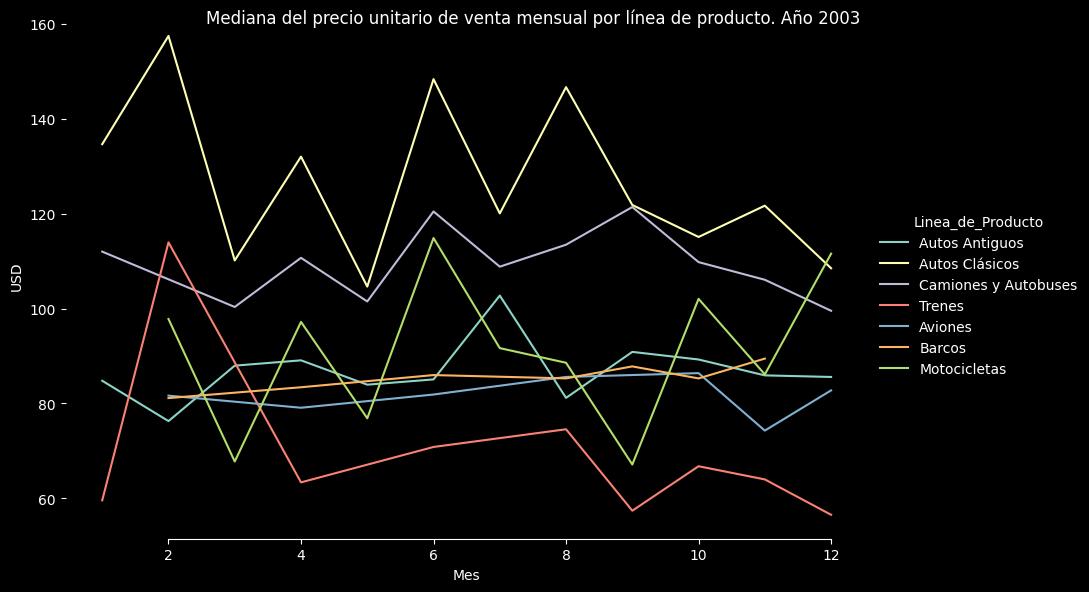

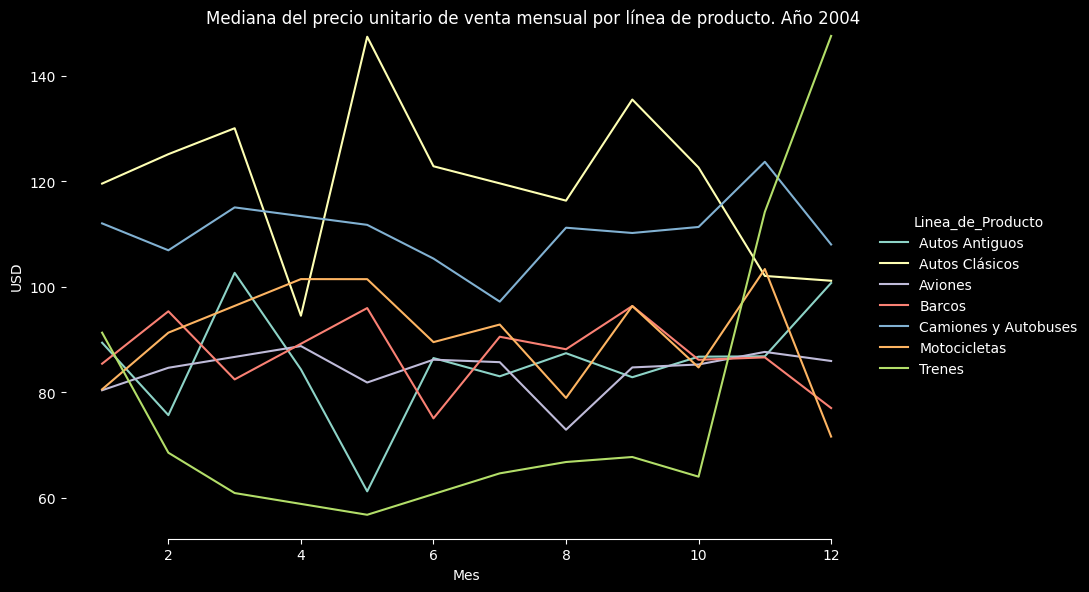

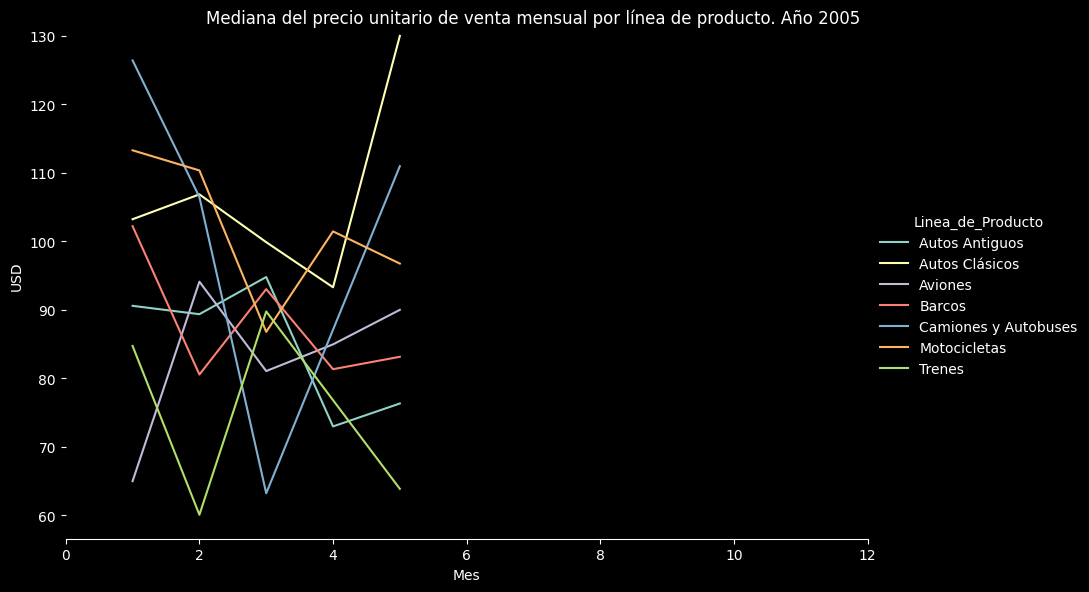

In [96]:
ax=sns.relplot(
                data=precio_promedio_mensual.query("ID_Año == 2003"),
                kind="line",
                x="ID_Mes", y="Precio_Unitario", hue="Linea_de_Producto",
                estimator=None,
                height=6, aspect=1.5
)
ax.figure.suptitle('Mediana del precio unitario de venta mensual por línea de producto. Año 2003')
ax.set(xlabel="Mes", ylabel="USD")
sns.despine(trim=True, left=True)
plt.show()
ax=sns.relplot(
                data=precio_promedio_mensual.query("ID_Año == 2004"),
                kind="line",
                x="ID_Mes", y="Precio_Unitario", hue="Linea_de_Producto",
                estimator=None,
                height=6, aspect=1.5
)
ax.figure.suptitle('Mediana del precio unitario de venta mensual por línea de producto. Año 2004')
ax.set(xlabel="Mes", ylabel="USD")
sns.despine(trim=True, left=True)
plt.show()
ax=sns.relplot(
                data=precio_promedio_mensual.query("ID_Año== 2005"),
                kind="line",
                x="ID_Mes", y="Precio_Unitario", hue="Linea_de_Producto",
                estimator=None,
                height=6, aspect=1.5
)
ax.figure.suptitle('Mediana del precio unitario de venta mensual por línea de producto. Año 2005')
ax.set(xlabel="Mes", ylabel="USD",xlim={0,12})
sns.despine(trim=True, left=True)
plt.show()

##### 6.5.3 Gráfico de la mediana del precio unitario año a año

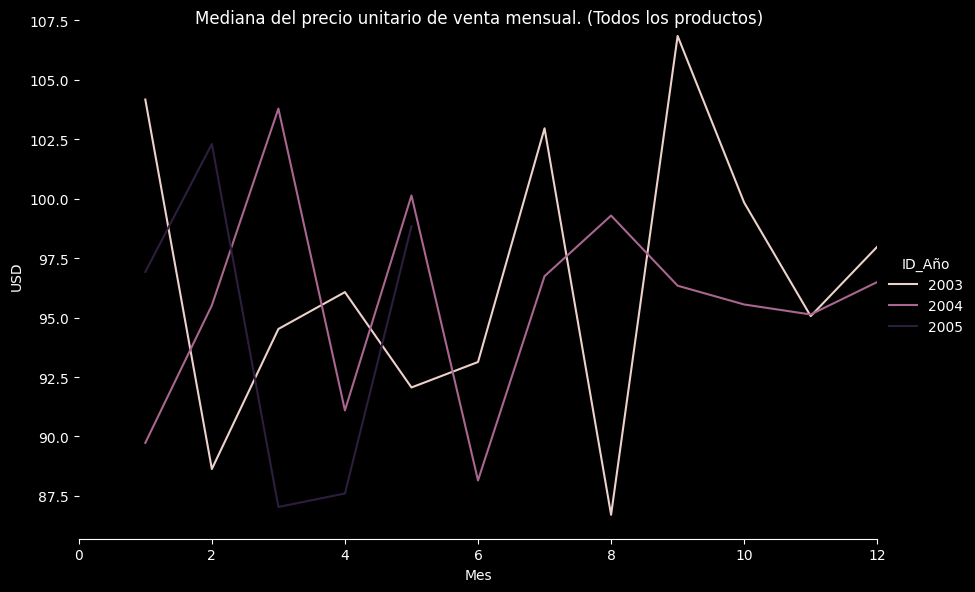

In [97]:
ax=sns.relplot(
                data=precio_promedio,
                kind="line",
                x="ID_Mes", y="Precio_Unitario",
                hue="ID_Año",
                estimator=None,
                height=6, aspect=1.5
)
ax.figure.suptitle('Mediana del precio unitario de venta mensual. (Todos los productos)')
ax.set(xlabel="Mes", ylabel="USD",xlim={0,12})
sns.despine(trim=True, left=True)
plt.show()

Esperábamos encontrarnos con una evolución de los precios relacionada con el consumo, sin embargo, no hay un patrón que nos permita sacar alguna conclusión desde lo visual. En principio, podemos agregar a la hipótesis que las líneas de producto pueden responder a los ciclos de producción y de venta. Es decir que salgan al mercado con un precio que se puede incrementar hasta que se necesite bajar el stock para contar con las finanzas necesarias para seguir operando.

#### 6.6 Precio unitario vs precio sugerido por el fabricante

Realizaremos un gráfico de dispersión para entender si hay una relación entre el precio de venta y el MSRP

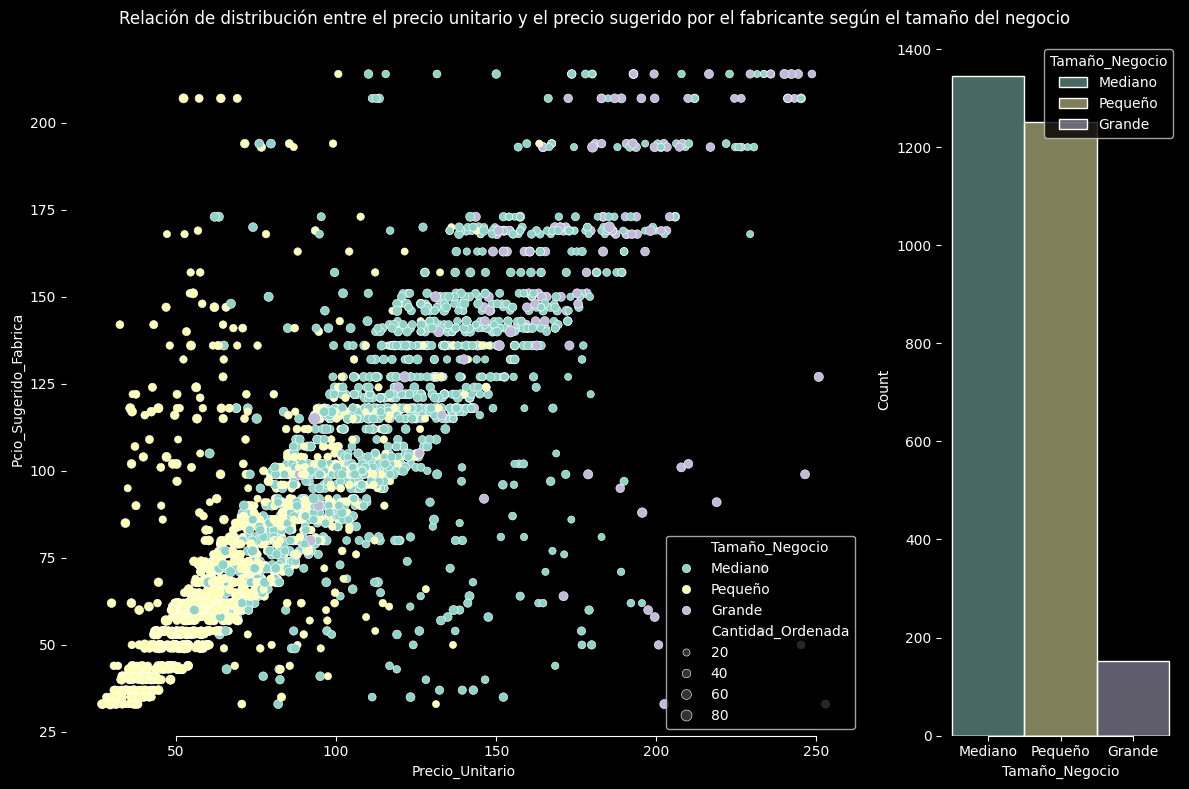

In [101]:
fig,axs = plt.subplots(1, 2, figsize=(12,8), gridspec_kw=dict(width_ratios=[5, 1.5]))
sns.set_style({'axes.grid': False})
sns.scatterplot(data = df_vendido, 
                x = df_vendido['Precio_Unitario'], 
                y = df_vendido['Pcio_Sugerido_Fabrica'],
                hue= df_vendido['Tamaño_Negocio'],
                size= df_vendido['Cantidad_Ordenada'], ax=axs[0])
sns.histplot(data = df_vendido, x = df_vendido['Tamaño_Negocio'], hue= df_vendido['Tamaño_Negocio'],ax=axs[1])
sns.despine(trim=True, left=True) #saca los ejes
fig.figure.suptitle('Relación de distribución entre el precio unitario y el precio sugerido por el fabricante según el tamaño del negocio')
fig.tight_layout()

En este gráfico podemos observar hay una relación directa entre el precio de venta y el precio sugerido de venta al por menor. Además hay negocios que genera una dispersión con una particularidad:
Los casos anómalos de negocios pequeños tienden a diferenciarse por tener un precio sugerido mayor al de venta, mientras que los negocios medianos, el precio sugerido está por debajo del precio de venta. 
En general, se puede inferir que la sugerencia de precio se hace con un criterio que es tenido en cuenta con rigurosidad.

### 7. Predicción del valor de cierre de venta de nuevas oportunidades

#### 7.1 Tratamiento de Outliers

In [102]:
columnas_numericas = df_vendido.select_dtypes(include='number')
columnas_numericas = columnas_numericas.drop('ID_Año',axis= 'columns')

##### 7.1.1 Distribuciones de las columnas con valores numéricos

La columna ID_Año no la vamos a tener encuenta, al estar buscando un modelo predictivo, sabemos que los años no se repetiran en el futuro.

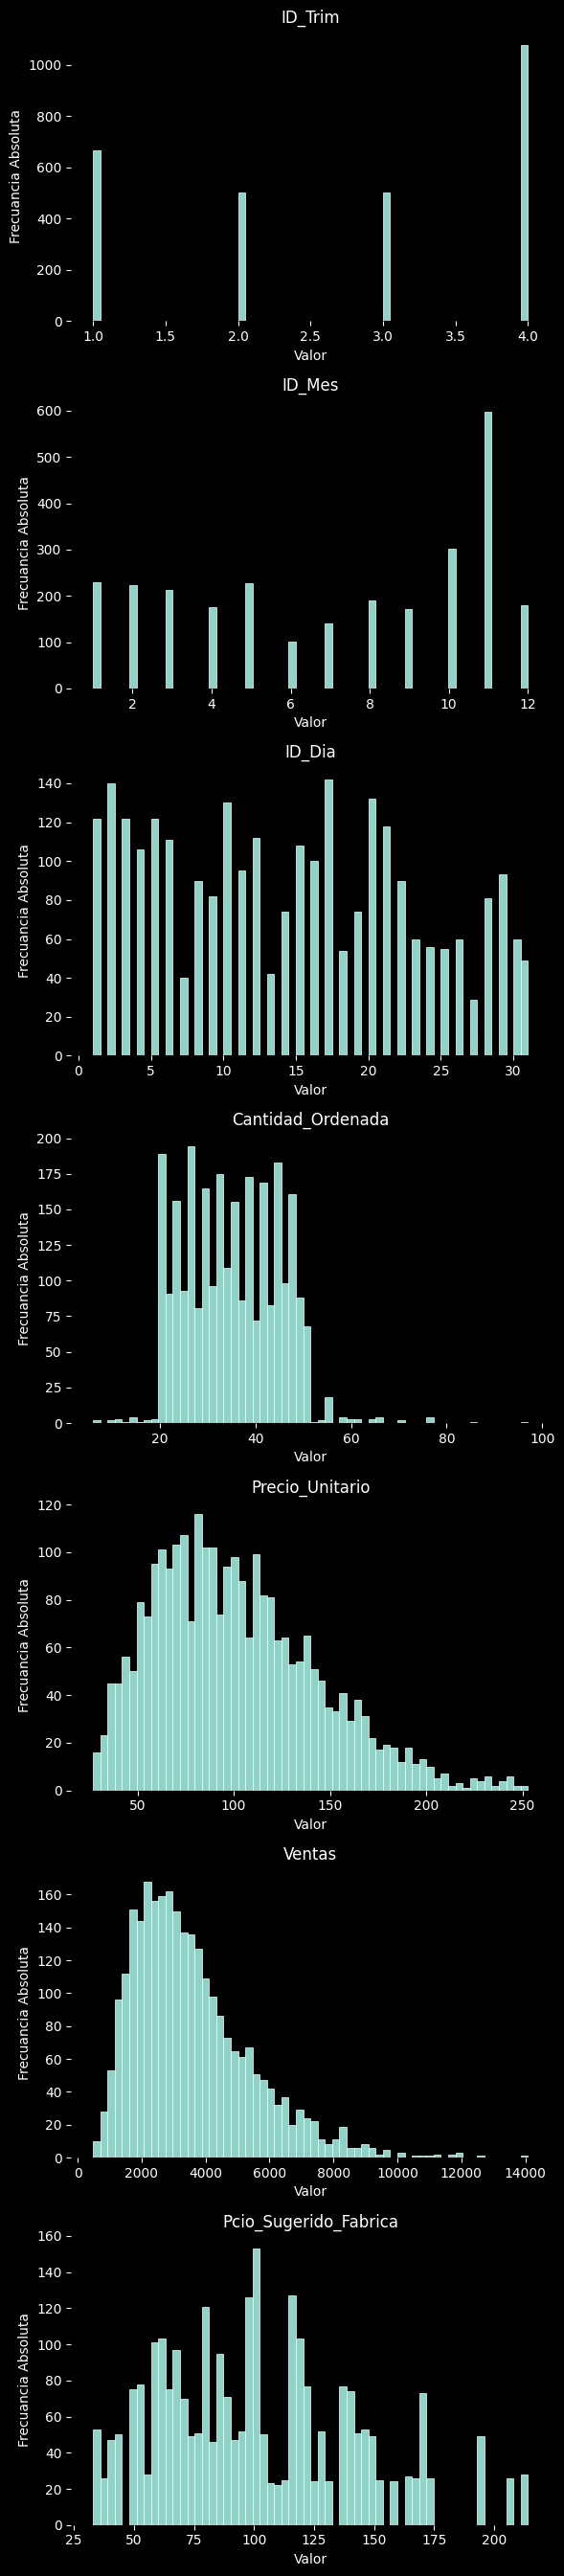

In [103]:
#Crea lienzo para cada columna
mpl.style.use('dark_background')
fig,ax = plt.subplots(len(columnas_numericas.columns),1,figsize=(6,27))

#Grafica los histogramas 
for i, col in enumerate(columnas_numericas.columns):
    ax[i].hist(df_vendido[col],bins=60, edgecolor='white', linewidth=0.5)
    ax[i].set_title(col)
    ax[i].set_xlabel('Valor')
    ax[i].set_ylabel('Frecuancia Absoluta')
    ax[i].grid(visible=False)
    ax[i].set_frame_on(False)
plt.tight_layout()
plt.show()

Podemos notar en las magnitudes en USD que tienen cierta tendencia a la normalidad. Se aprecia que tendremos que tratar outliers, en el gráfico presentado a continuación podremos verlo con mayor claridad.

##### 7.1.2 Grafico de caja de las columnas con valores numéricos

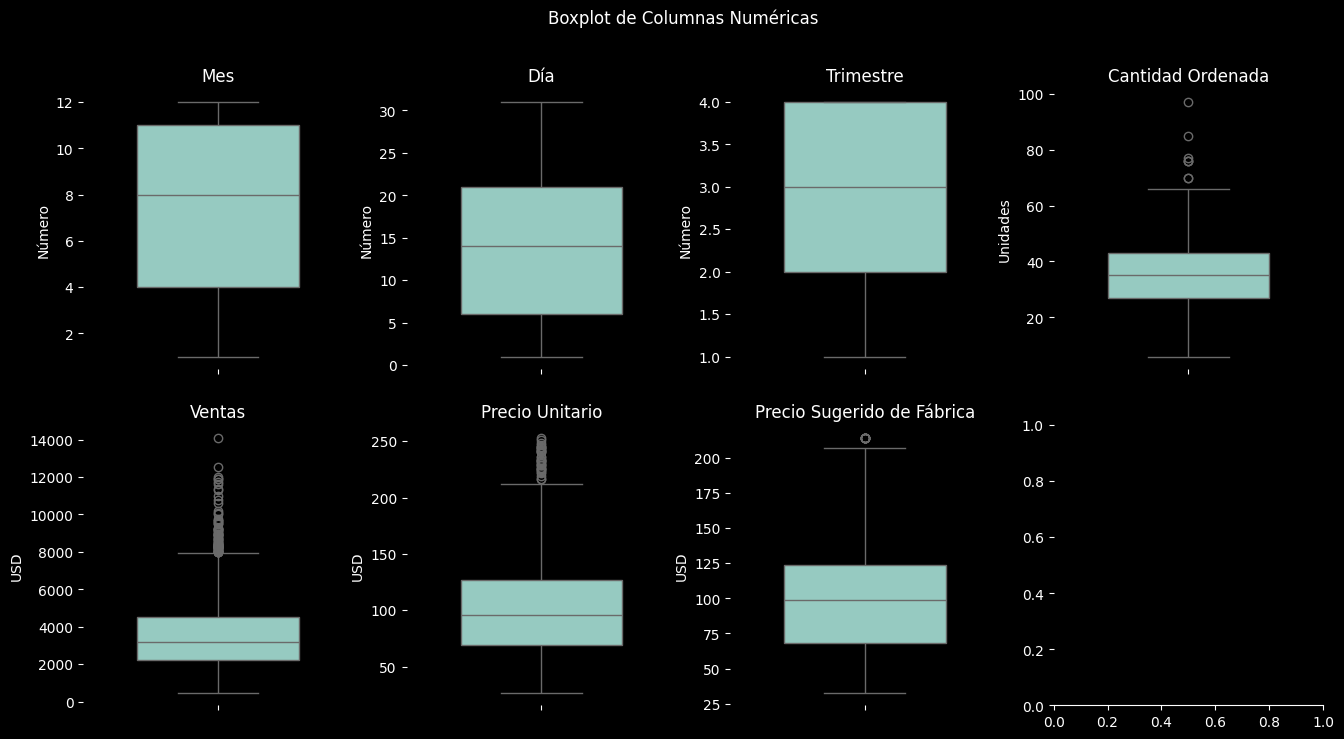

In [104]:
#Creo lienzo 
fig,axes = plt.subplots(nrows= 2, ncols= 4, figsize=(16,8))
fig.suptitle("Boxplot de Columnas Numéricas")

#boxplot de cada columna
sns.boxplot(columnas_numericas, y = 'ID_Mes', width=.6, ax=axes[0,0])
sns.boxplot(columnas_numericas, y = 'ID_Dia', width=.6, ax=axes[0,1])
sns.boxplot(columnas_numericas, y = 'ID_Trim', width=.6, ax=axes[0,2])
sns.boxplot(columnas_numericas, y = 'Cantidad_Ordenada', width=.6, ax=axes[0,3])
sns.boxplot(columnas_numericas, y = 'Ventas', width=.6, ax=axes[1,0])
sns.boxplot(columnas_numericas, y = 'Precio_Unitario', width=.6, ax=axes[1,1])
sns.boxplot(columnas_numericas, y = 'Pcio_Sugerido_Fabrica', width=.6, ax=axes[1,2])

#Agrego los títulos
axes[0, 0].set_title("Mes")
axes[0, 1].set_title("Día")
axes[0, 2].set_title("Trimestre")
axes[0, 3].set_title("Cantidad Ordenada")
axes[1, 0].set_title("Ventas")
axes[1, 1].set_title("Precio Unitario")
axes[1, 2].set_title("Precio Sugerido de Fábrica")

# Agrego etiquetas para el eje y
axes[0, 0].set_ylabel("Número")
axes[0, 1].set_ylabel("Número")
axes[0, 2].set_ylabel("Número")
axes[0, 3].set_ylabel("Unidades")
axes[1, 0].set_ylabel("USD")
axes[1, 1].set_ylabel("USD")
axes[1, 2].set_ylabel("USD")

sns.despine(trim=True, left=True)
plt.show()

#### 7.2 Criterio para remover Outliers
Debemos reemplazar los Outliers de las columnas *Cantidad_Ordenada*, *Ventas*, *Precio_Unitario* y *Pcio_Sugerido_Fabrica*.
Como estas variables no son normales, tienen distribución con asimetría a izquierda, excepto el *Pcio_Sugerido_Fabrica* que tiene un aspecto más similar a la normal; utilizaremos el método del rango intercuartílico (IQR, su sigla en inglés). En consecuencia, **se reemplazan los Oultiers por la mediana**.

In [106]:
#outliers por el método del IQR
q1 = columnas_numericas.quantile(q=0.25)
q2 = columnas_numericas.quantile(q=0.5)
q3 = columnas_numericas.quantile(q=0.75)
iqr = q3 - q1#rango intercuartilico
m = 1.1 # múltiplo
upper = q3 + m*iqr#max de mi intervalo de confianza
lower = q1 - m*iqr#min de mi intervalo de confianza

#Esta ciclo reemplaza los valores de los outliers por la mediana de cada columna
df_sin_outliers = columnas_numericas.copy()
for column in df_sin_outliers:
    outliers_mask = (df_sin_outliers[column] < lower[column]) | (df_sin_outliers[column] > upper[column])
    df_sin_outliers.loc[outliers_mask,column] = columnas_numericas[column].median()

#### 7.3 Boxplot luego de reemplazar los Outliers por la mediana

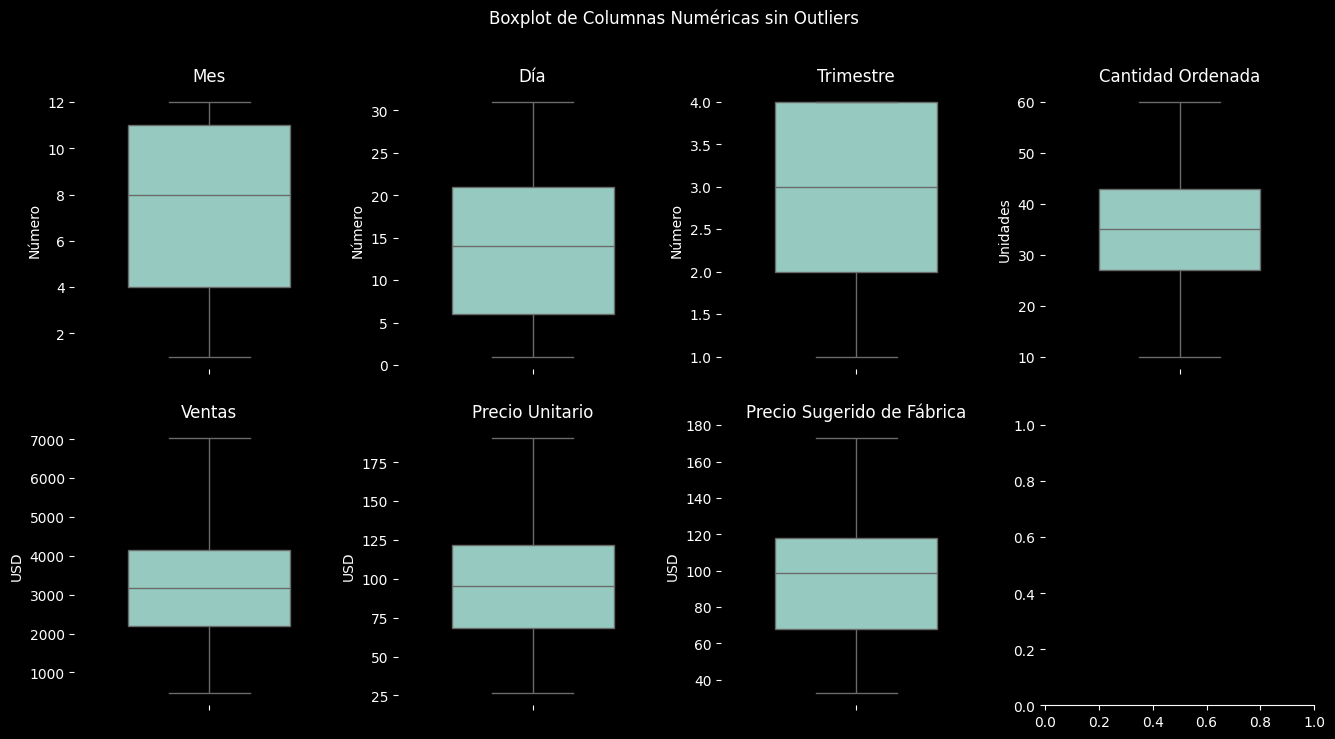

In [107]:
#Creo lienzo 
fig,axes = plt.subplots(nrows= 2, ncols= 4, figsize=(16,8))
fig.suptitle("Boxplot de Columnas Numéricas sin Outliers")

#boxplot de cada columna
sns.boxplot(df_sin_outliers, y = 'ID_Mes', width=.6, ax=axes[0,0])
sns.boxplot(df_sin_outliers, y = 'ID_Dia', width=.6, ax=axes[0,1])
sns.boxplot(df_sin_outliers, y = 'ID_Trim', width=.6, ax=axes[0,2])
sns.boxplot(df_sin_outliers, y = 'Cantidad_Ordenada', width=.6, ax=axes[0,3])
sns.boxplot(df_sin_outliers, y = 'Ventas', width=.6, ax=axes[1,0])
sns.boxplot(df_sin_outliers, y = 'Precio_Unitario', width=.6, ax=axes[1,1])
sns.boxplot(df_sin_outliers, y = 'Pcio_Sugerido_Fabrica', width=.6, ax=axes[1,2])

#Agrego los títulos
axes[0, 0].set_title("Mes")
axes[0, 1].set_title("Día")
axes[0, 2].set_title("Trimestre")
axes[0, 3].set_title("Cantidad Ordenada")
axes[1, 0].set_title("Ventas")
axes[1, 1].set_title("Precio Unitario")
axes[1, 2].set_title("Precio Sugerido de Fábrica")

# Agrego etiquetas para el eje y
axes[0, 0].set_ylabel("Número")
axes[0, 1].set_ylabel("Número")
axes[0, 2].set_ylabel("Número")
axes[0, 3].set_ylabel("Unidades")
axes[1, 0].set_ylabel("USD")
axes[1, 1].set_ylabel("USD")
axes[1, 2].set_ylabel("USD")

sns.despine(trim=True, left=True)
plt.show()

Reemplazando por la mediana a los outliers que se encontraban fuera del rango intercuartílico nos independizamos de posteriores efectos indeseados en la predicción. 

#### 7.4 Medicón de la mediana luego del reemplazo
Luego del reemplazo podemos ver también que las medianas son coincidentes antes y después del reemplazo. Por lo que podemos apreciar que sigue siendo representativo.

In [109]:
#Comparo las medianas antes y después
d1= dict(pd.Series(columnas_numericas.median()))
d2= dict(pd.Series(df_sin_outliers.median()))
d= [d1, d2]
pd.DataFrame(d, index=["Mediana antes","Mediana después"])

,ID_Trim,ID_Mes,ID_Dia,Cantidad_Ordenada,Precio_Unitario,Ventas,Pcio_Sugerido_Fabrica
Mediana antes,3.0,8.0,14.0,35.0,95.7,3184.8,99.0
Mediana después,3.0,8.0,14.0,35.0,95.7,3184.8,99.0


#### 7.5 Encodeo de variables no numéricas

##### 7.5.1 Identificación de variables no numéricas
En una tabla aparte colocamos estas variables para poder encodearlas. Utilizaremos Label Encoder y Ordinal Encoder de Scikit Learn.

In [110]:
from sklearn import preprocessing

# Identifico cuáles son las variables no numéricas
columnas_no_numericas = df_vendido.select_dtypes(exclude= 'number')
columnas_no_numericas = columnas_no_numericas.drop('Fecha_de_Orden', axis= 'columns')
columnas_no_numericas

,Dia_Semana,Linea_de_Producto,Codigo_Pdto,Estatus,Tamaño_Negocio,Nombre_Cliente,Ciudad,Pais,Estado
578,lunes,Autos Antiguos,S18_1749,Enviada,Mediano,Online Diecast Creations Co.,Nashua,Estados Unidos,NH
680,lunes,Autos Antiguos,S18_2248,Enviada,Mediano,Online Diecast Creations Co.,Nashua,Estados Unidos,NH
1267,lunes,Autos Antiguos,S18_4409,Enviada,Pequeño,Online Diecast Creations Co.,Nashua,Estados Unidos,NH
2024,lunes,Autos Antiguos,S24_3969,Enviada,Pequeño,Online Diecast Creations Co.,Nashua,Estados Unidos,NH
1539,jueves,Autos Antiguos,S24_1937,Enviada,Pequeño,"Blauer See Auto, Co.",Frankfurt,Alemania,Germany
...,...,...,...,...,...,...,...,...,...
2405,martes,Camiones y Autobuses,S50_1392,En Proceso,Pequeño,La Rochelle Gifts,Nantes,Francia,France
393,martes,Camiones y Autobuses,S12_4473,En Proceso,Mediano,La Rochelle Gifts,Nantes,Francia,France
160,martes,Autos Clásicos,S10_4962,En Proceso,Mediano,La Rochelle Gifts,Nantes,Francia,France
2302,martes,Camiones y Autobuses,S32_3522,En Proceso,Pequeño,Euro Shopping Channel,Madrid,España,Spain


In [111]:
# Compruebo que efectivamente son objet
columnas_no_numericas.dtypes

Dia_Semana           object
Linea_de_Producto    object
Codigo_Pdto          object
Estatus              object
Tamaño_Negocio       object
Nombre_Cliente       object
Ciudad               object
Pais                 object
Estado               object
dtype: object

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder = LabelEncoder()
dias_semana = ['lunes','martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
tamaño= ['Pequeño', 'Mediano', 'Grande']
enc = OrdinalEncoder(categories= [dias_semana])
enc1 = OrdinalEncoder(categories= [tamaño])

# Encodedeo de columnas
columnas_no_numericas[['Dia_Semana']]=enc.fit_transform(columnas_no_numericas[['Dia_Semana']]) # Con Ordinal Encoder
columnas_no_numericas[['Tamaño_Negocio']] = enc1.fit_transform(columnas_no_numericas[['Tamaño_Negocio']]) # Con Ordinal Encoder
columnas_no_numericas['Linea_de_Producto'] = label_encoder.fit_transform(columnas_no_numericas['Linea_de_Producto']) # En adelante con Label Encoder
columnas_no_numericas['Codigo_Pdto'] = label_encoder.fit_transform(columnas_no_numericas['Codigo_Pdto'])
columnas_no_numericas['Estatus'] = label_encoder.fit_transform(columnas_no_numericas['Estatus'])
columnas_no_numericas['Nombre_Cliente'] = label_encoder.fit_transform(columnas_no_numericas['Nombre_Cliente'])
columnas_no_numericas['Ciudad'] = label_encoder.fit_transform(columnas_no_numericas['Ciudad'])
columnas_no_numericas['Pais'] = label_encoder.fit_transform(columnas_no_numericas['Pais'])
columnas_no_numericas['Estado'] = label_encoder.fit_transform(columnas_no_numericas['Estado'])


##### 7.5.2 Resultado de las variables no númericas encodeadas

In [113]:
columnas_no_numericas.head(15)

,Dia_Semana,Linea_de_Producto,Codigo_Pdto,Estatus,Tamaño_Negocio,Nombre_Cliente,Ciudad,Pais,Estado
578,0.0,0,22,2,1.0,60,44,7,13
680,0.0,0,26,2,1.0,60,44,7,13
1267,0.0,0,48,2,0.0,60,44,7,13
2024,0.0,0,78,2,0.0,60,44,7,13
1539,3.0,0,59,2,0.0,13,19,0,8
1616,3.0,0,62,2,0.0,13,19,0,8
728,3.0,0,28,2,1.0,13,19,0,8
830,3.0,0,32,2,1.0,13,19,0,8
501,4.0,0,19,2,0.0,88,42,7,17
475,4.0,0,18,2,1.0,88,42,7,17


##### 7.5.3 Unificación del dataframe
Los datos transformaron por separado, los numéricos y los no numéricos. Volvemos a juntarlos en una misma tabla para ver si hay colinealidad de variables.

In [115]:
df_transformado = df_sin_outliers.copy()
for col in columnas_no_numericas.columns:
    df_transformado[col] = columnas_no_numericas[col]

In [116]:
x_juguetes = df_transformado.drop('Ventas',axis='columns')
y_juguetes = df_transformado['Ventas']

##### 7.5.4 Correlación entre variables

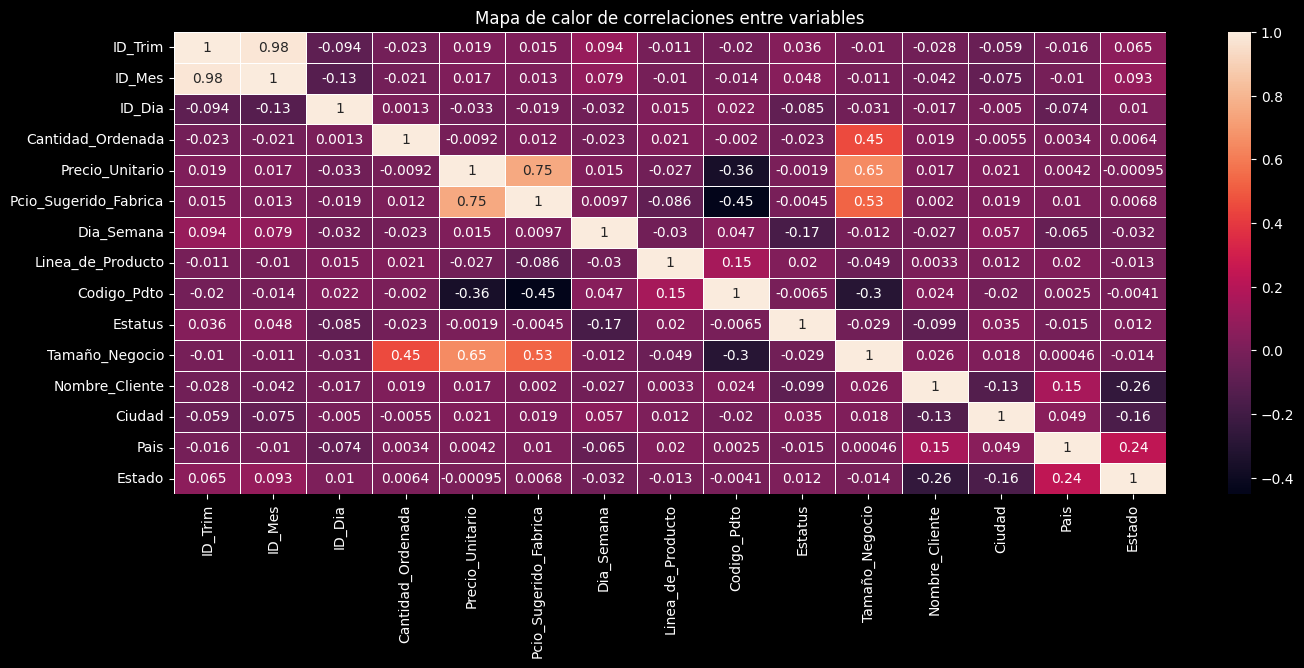

In [117]:
#Mapa de calor 
plt.figure(figsize=(16,6))
ax= sns.heatmap(x_juguetes.corr(), linewidths=0.5, linecolor='white', annot=True, fmt= '.2g', square= False)
ax.set_title('Mapa de calor de correlaciones entre variables')
plt.show()

El mapa de calor de correlaciones nos ayuda a determinar cuáles son las columnas que se correlacionan y debemos tratar para evitar colinealidad:
Los pares que correlacionan en más de 0,6 o menos de -0.6 son:

{*ID_Trim*, *ID_Mes*} , {*Precio_Unitario*, *Tamaño_Negocio*} , {*Precio_Unitario*, *Pcio_Sugerido_Fabrica*} 
 
Eliminamos las columnas *ID_Trim* y *Precio_Unitario*. 

In [118]:
x_juguetes = x_juguetes.drop({'ID_Trim','Precio_Unitario'},axis='columns')
x_juguetes.head()

,ID_Mes,ID_Dia,Cantidad_Ordenada,Pcio_Sugerido_Fabrica,Dia_Semana,Linea_de_Producto,Codigo_Pdto,Estatus,Tamaño_Negocio,Nombre_Cliente,Ciudad,Pais,Estado
578,1,6,30,170,0.0,0,22,2,1.0,60,44,7,13
680,1,6,50,60,0.0,0,26,2,1.0,60,44,7,13
1267,1,6,22,92,0.0,0,48,2,0.0,60,44,7,13
2024,1,6,49,41,0.0,0,78,2,0.0,60,44,7,13
1539,1,9,45,33,3.0,0,59,2,0.0,13,19,0,8


#### 7.6 Procesamiento

##### 7.6.1 Instalación y llamado de librerías
Para hacerl la reducción de dimensionalidad (*feature selection*) instalamos la librería **mlxtend** e importo la librería para este fin.
Llamamos las librerías de **Scikit Learn** para previamente escalar las variables.

In [119]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

##### 7.6.2 Selección del escalador a utilizar
Si la distribución de las variables es normal se utilizará el Standard Scaler, pero sino utilizaré el Robust Scaler. Revisemos todas las variables para ver que desición tomar.

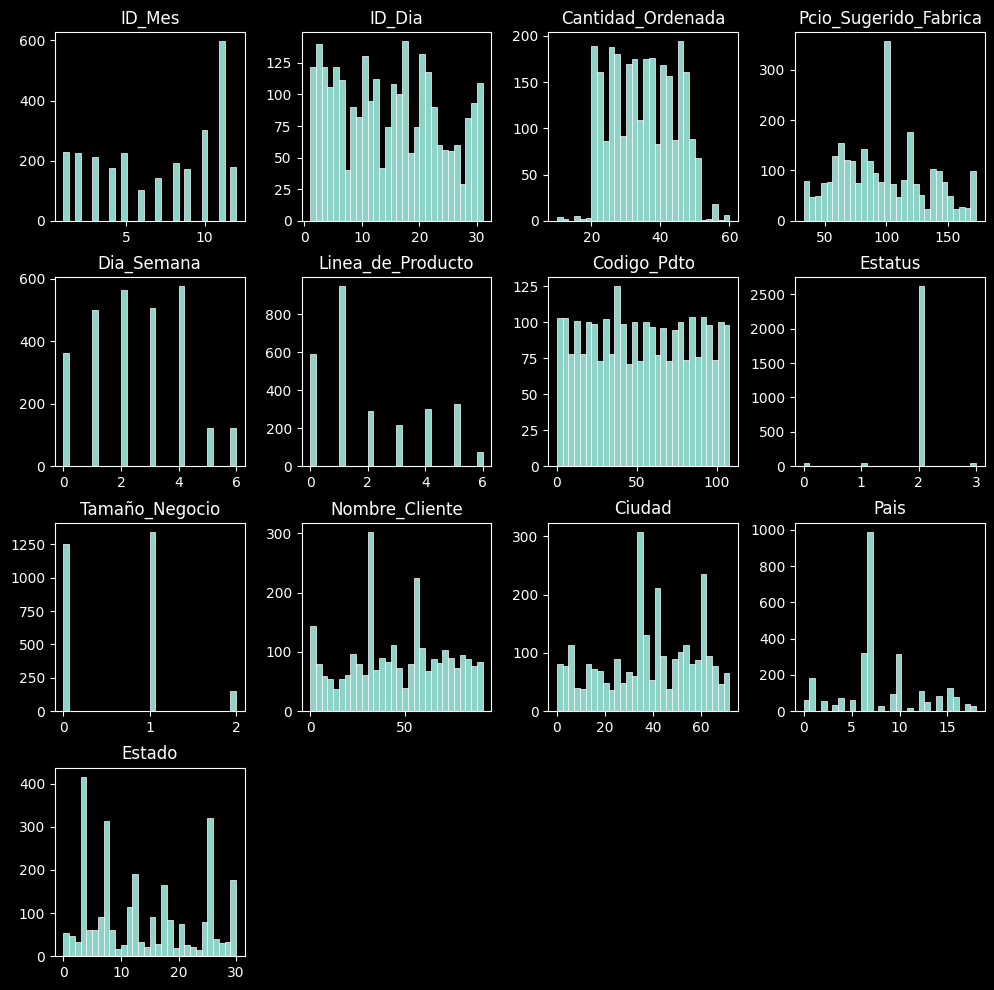

In [148]:
x_train_juguetes, x_test_juguetes, y_train_juguetes, y_test_juguetes = train_test_split(x_juguetes,y_juguetes, test_size= 0.2, random_state= 42)
#Escalaré las variables normales por el Standard Scaler y las que no son normales por Robust Scaler
x_juguetes.hist(figsize=[12,12], bins= 30, grid=False,edgecolor='white', linewidth=0.5)
plt.grid(visible=False)
plt.show()

Como ninguna variable tiene una fuerte cercanía a una distribución normal le daremos a todas tratamiento de escalado con el Robust Scaler. Para luego sí quedarnos solo conlas variables más relevantes para el aprendizaje no supervisado.

##### 7.6.3 Escalado de variables de entranamiento y de prueba

In [139]:
# Se selecciona el RobustScaler porque ninguna se parece mucho a una distribución normal
escalador = RobustScaler()
x_train_juguetes_escalado = escalador.fit_transform(x_train_juguetes)
x_test_juguetes_escalado = escalador.fit_transform(x_test_juguetes)

##### 7.6.4 Reducción de dimensionalidad (Feature Selection)
Utilizamos el **Sequential Feature Selector** con el estimador **Reandom Forest Regressor**.  

In [159]:
estimador = RandomForestRegressor() 
sfs = SFS(estimador,
          k_features= 5,
          forward=True,
          floating= False,
          scoring= 'neg_mean_squared_error',
          cv= 5
          )
sfs.fit(x_train_juguetes_escalado, y_train_juguetes)
x_train_juguetes_seleccionado = sfs.transform(x_train_juguetes_escalado)
x_test_juguetes_seleccionado = sfs.transform(x_test_juguetes_escalado)

In [160]:
x_test_juguetes_seleccionado

array([[-0.26666667, -0.65306122,  1.5       ,  0.        , -0.51282051],
       [ 0.26666667,  0.44897959,  0.        ,  0.        ,  0.28205128],
       [-1.        , -0.16326531, -0.5       , -1.        ,  0.69230769],
       ...,
       [ 0.73333333, -0.2244898 ,  0.        ,  0.        ,  0.28205128],
       [ 0.13333333,  0.3877551 ,  1.5       ,  0.        , -0.61538462],
       [ 0.93333333, -1.08163265, -0.5       , -1.        , -0.97435897]])

In [161]:
#Regresión con el conjunto de datos
regressor_juguetes= RandomForestRegressor()

#Entreno X e Y
regressor_juguetes.fit(x_train_juguetes_seleccionado, y_train_juguetes)

#Hago la predicción sobre el Xtest
y_pred_juguetes= regressor_juguetes.predict(x_test_juguetes_seleccionado)

#Mido el score comparando el Ytest (real) con lo predicho por el y_pred_juguetes
mse_juguetes= mean_squared_error(y_test_juguetes, y_pred_juguetes)

print("\nMean Squared Error (Dataset Juguetes):", mse_juguetes)
print("\nPara colocar el error medio en la misma unidad que la variable Y = Ventas, le hacemos la raiz cuadrada.")
print("\nEl error en valor absoluto es: ± USD", round((mse_juguetes**(1/2)),2))


Mean Squared Error (Dataset Juguetes): 474963.74924606935

Para colocar el error medio en la misma unidad que la variable Y = Ventas, le hacemos la raiz cuadrada.

El error en valor absoluto es: ± USD 689.18


### 8. Conclusión

**La herramienta**. Hemos logrado modelizar una predicción que ingresando 5 datos de una oportunidad de venta y nos devuelva el valor de cierre probable con un error de ± USD 690. Esto, en conjunto con una semaforización adecuada por parte del Departamento Comercial, pretendemos que sea una herramienta proderosa para la previsión de fondos necesarios para los proyectos en curso.

Por otra parte, hemos aprendido de los datos del negocio las informaciones siguientes que requieren la validación de los especialistas de la compañia.

Se realizaron los siguientes hallasgos:
**TENDENCIA DE CRECIMIENTO**. Año a año las ventas se van superando, como pudimos ver en el análisis gráfico.

**ESTACIONALIDAD**. Sabemos que en los meses previos a navidad se dan los picos de venta. Será importante tener los stocks necesarios para afrontar los meses entre octubre y diciembre. 
Previo a los días festivos en donde se regalan juguetes tambien es un momento de suba en las ventas. En este sentido, es conveniente prestar especial atención y tener disponibilidad 30 días de las festividades de los niños. Principalmente para poder entregar los pedidos de los clientes de los paises que más compran:
Australia: 4to miércoles de octubre
Francia: 1 de junio
España: 15 de abril
Estados Unidos: 2do domingo de julio

**_PRICING_**. Los precios unitarios de venta no se modifican de acuerdo a la estacionalidad sino que varían de acuerdo a la oferta y la demanda instantánea, dado el crecimiento del negocio, es altamente probable que esta sea la mejor manera de manejarlo.

**PRECIO SUGERIDO POR EL FABRICANTE**. Este parametro tiene relación lineal con el precio unitario de venta. Es esperable que esté por encima del precio unitario, pero ante los ajuste del precio unitario no siempre sucede.

Se sugiere una revisión de todo el proceso ante cambios del contexto comercial interno o externo.